# Klaviyo Screening Test

Name: Raghav Ravisankar
Email: raghav96@gmail.com

Exercise

The attached CSV file lists the customer, date, and dollar value of orders placed at a store in 2017. The gender of each customer is also provided.

A) Assemble a dataframe with one row per customer and the following columns:
   - customer_id
   - gender
   - most_recent_order_date
   - order_count (number of orders placed by this customer)

B) Plot the count of orders per week.

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?


Importing all the required packages here

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Importing the values from the csv file and displaying the data

In [2]:
df = pd.read_csv("data_science_screening_exercise_orders.csv")
print(len(df))
print(len(set(df['customer_id'])))
df.head()

13471
8814


,customer_id,gender,date,value
0,1000,0,2017-01-01 00:11:31,198.5
1,1001,0,2017-01-01 00:29:56,338.0
2,1002,1,2017-01-01 01:30:31,733.0
3,1003,1,2017-01-01 01:34:22,772.0
4,1004,0,2017-01-01 03:11:54,508.0


Assemble a dataframe with one row per customer and the following columns: 
- customer_id
- gender
- most_recent_order_date
- order_count (number of orders placed by this customer)

I am making the assumption here that:
- column ['value'] == column ['order_count'] 
- column ['date'] == column ['most_recent_order_date']

In [3]:
df['date'] = df['date'].apply( lambda d : d.split(' ')[0])	
df['most_recent_order_date'] = df["date"]
df['order_count'] = df['value']
del(df['date'])
del(df['value'])
df.head()

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01,198.5
1,1001,0,2017-01-01,338.0
2,1002,1,2017-01-01,733.0
3,1003,1,2017-01-01,772.0
4,1004,0,2017-01-01,508.0


Plot the count of orders per week
- The assumption I am making is that the report the week's dates to be the Mondays of each week.
- I am taking the sum of all the orders in a week

Here, I have to convert the dataframe into datetime objects and create a DateTimeIndex to group by weeks

In [4]:
df['most_recent_order_date'] = pd.to_datetime(df['most_recent_order_date'])

In [5]:
df.set_index(df["most_recent_order_date"],inplace=True)
df.head()

,customer_id,gender,most_recent_order_date,order_count
most_recent_order_date,,,,
2017-01-01,1000,0,2017-01-01,198.5
2017-01-01,1001,0,2017-01-01,338.0
2017-01-01,1002,1,2017-01-01,733.0
2017-01-01,1003,1,2017-01-01,772.0
2017-01-01,1004,0,2017-01-01,508.0


Now to group the values

In [6]:
count_week = df['order_count'].resample('W').sum()

Now over to the actual plotting

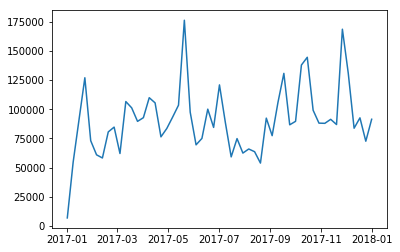

In [7]:
plt.plot(count_week)

Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

Here I am going to groupby gender and see the mean order value for each gender and plot the values in a bar chart

<Container object of 2 artists>

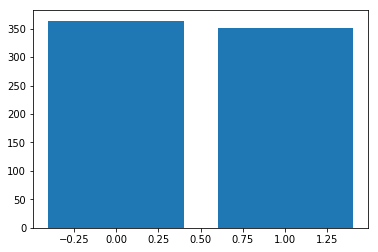

In [8]:
gender_means = df.groupby(['gender']).mean()
plt.bar([0,1], height=gender_means['order_count'])

Now, over to displaying the actual values

In [9]:
gender_means['order_count']

gender
0    363.890006
1    350.708361
Name: order_count, dtype: float64

Some more fun stuff, showing the distribution of orders by customer

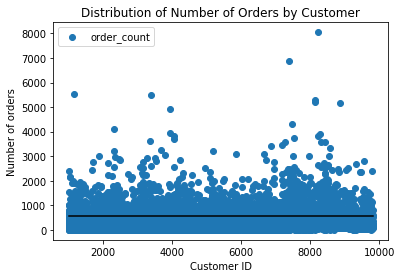

Black line indicates the mean count of orders by customer


In [35]:
import plotly.plotly as py

m = df.groupby(['customer_id']).sum().mean()
m= m['order_count']

plt.scatter(x=df['customer_id'], y=df['order_count'])
plt.title('Distribution of Number of Orders by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of orders')
plt.legend()
plt.plot([min(df['customer_id']),max(df['customer_id'])], [m,m], 'k-')
plt.show()
print('Black line indicates the mean count of orders by customer')